1216 수상작 리뷰

**저해상도 조류 이미지 분류 AI 경진대회**

[https://dacon.io/competitions/official/236251/codeshare/10434?page=1&dtype=recent](https://dacon.io/competitions/official/236251/codeshare/10434?page=1&dtype=recent)


- 대회 내용
인도의 한 오지 지역에서, 가상의 프로젝트 'IndiaBirdNet'은 다양한 조류 종이 서식하는 이 지역의 생물 다양성을 연구하고 보호하려는 노력의 일환임. 하지만 여러 제약 상황으로 인해, 프로젝트 팀은 현장에서 고해상도 이미지의 캡처 및 전송이 불가능하다는 결론에 도달했음. 이 문제를 해결하기 위한 창의적 대안으로, 연구팀은 초소형 드론에 저해상도 카메라를 장착하기로 결정. 최종적으로는 초소형 드론에 장착된 카메라로부터 촬영된 저해상도 이미지를 AI 모델이 작동하는 서버에 전송한 뒤, AI 모델은 전송받은 이미지를 활용하여 모델의 입력으로 사용하고 조류의 종들을 분류함.

- 데이터
    - train
        - 학습용 64x64 저해상도 조류 이미지 15,834장
        - TRAIN_00000.jpg ~ TRAIN_15833.jpg

    - test
        - 평가용 64x64 저해상도 조류 이미지 6,786장
        - TEST_00000.jpg ~ TEST_06785.jpg

    - upscale_train
        - 학습용 저해상도 조류 이미지를 x4 Upscale 한 PNG 이미지 (256X256)

    - train.csv
        - img_path : 저해상도 조류 이미지 파일 경로
        - upscale_img_path : Upscale된 조류 이미지 파일 경로
        - label : 조류의 종 (Target)

    - test.csv
        - ID : 샘플 고유 ID
        - img_path : 저해상도 조류 이미지 파일 경로

    - sample_submission.csv
        - ID : 샘플 고유 ID
        - label : 예측한 조류의 종 (Target)


- 전체적인 코드 구성
    - 기본 요소
        - CrossValidation : 5 Fold
        - 모델 앙상블 : eva_large, beitv2_large

    - 성능향상 요소
        - 이미지 Resize 알고리즘 : 여러가지 테스트해보았지만, 'ranczos'보다 'robidouxsharp'가 더 좋았음.
        - CrossEntropyLoss 적용 : class_weight와 LabelSmoothing 반영
        - EarlyStopping 알고리즘 최적화 : val_score를 감안한 val_loss 사용
        - 이미지 Augmentation 최적화 : TAW 사용. 몇가지 Augmentation 기법은 성능 하락하여 삭제.
        - 지수 감쇠방식의 코사인 LR 스케쥴러 사용
        - RTX-A4000 16GB GPU 사용 : 큰 BATCH_SIZE 사용 등.



- 라이브러리, 모듈 임포트

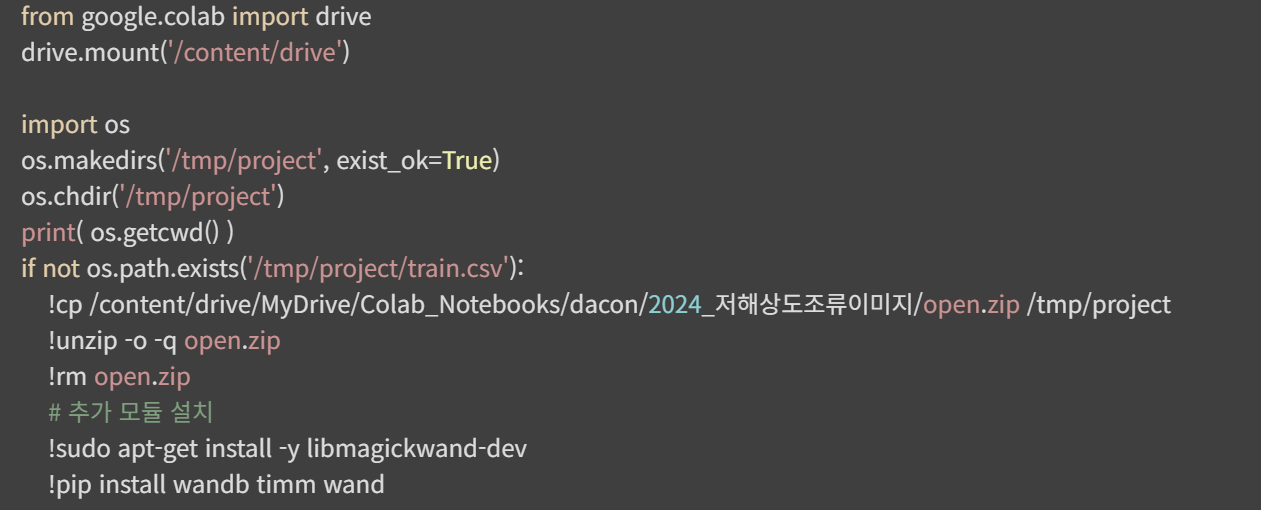

- 함수 정의

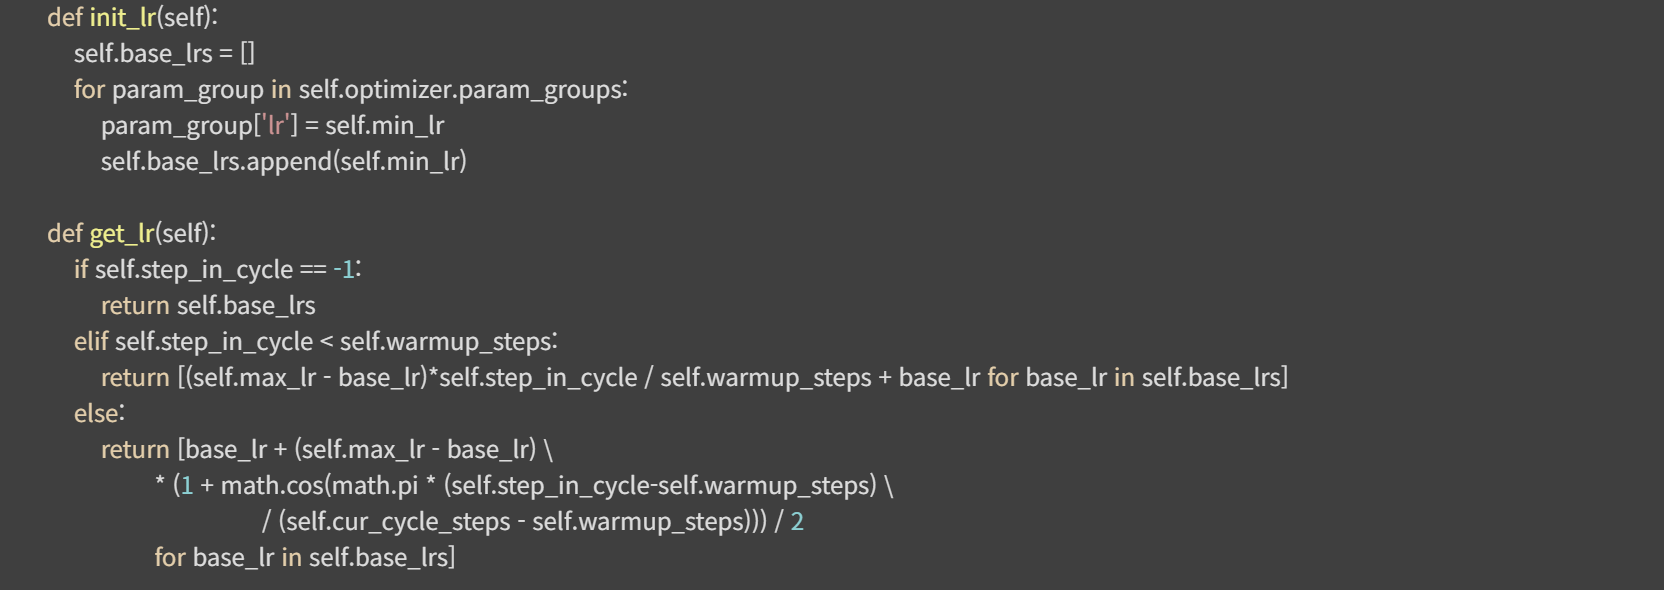

- 데이터 불러오기

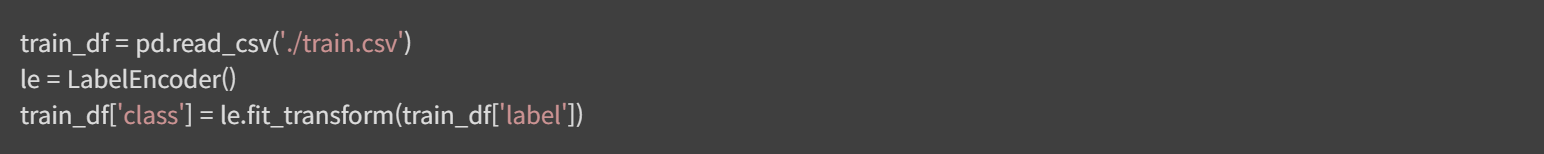

- 모델 훈련

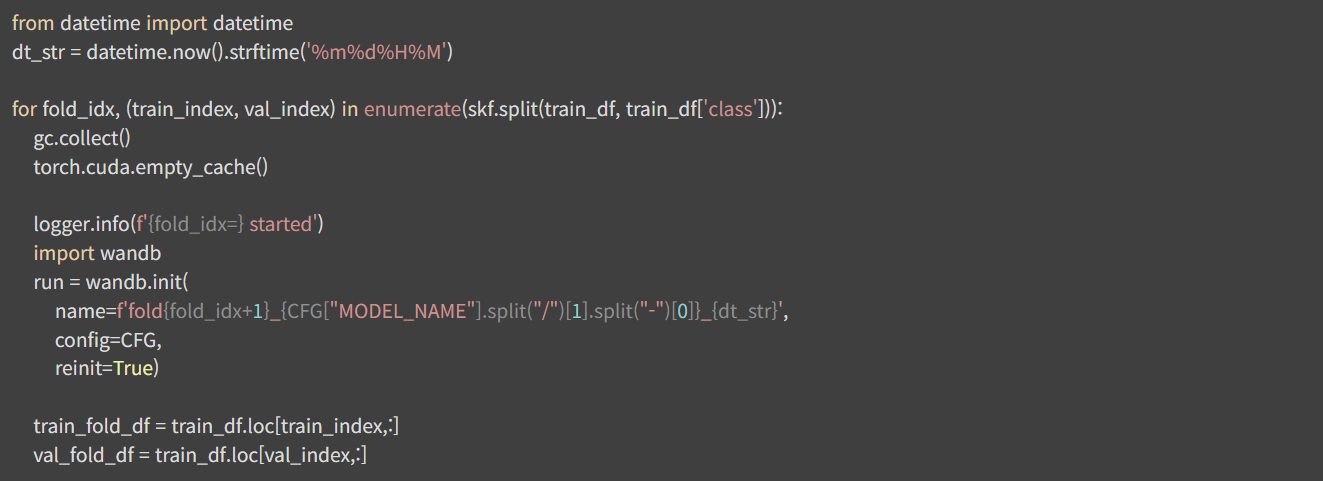

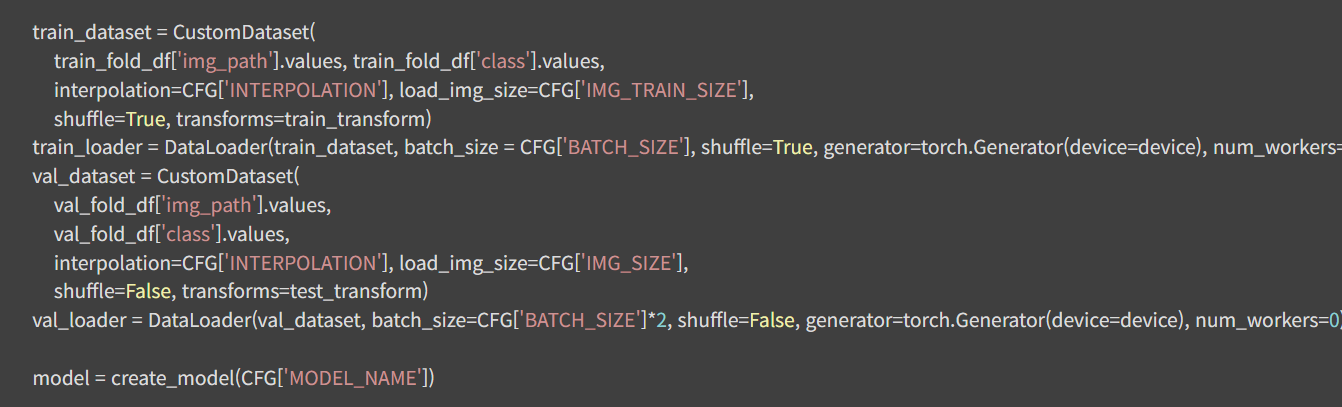

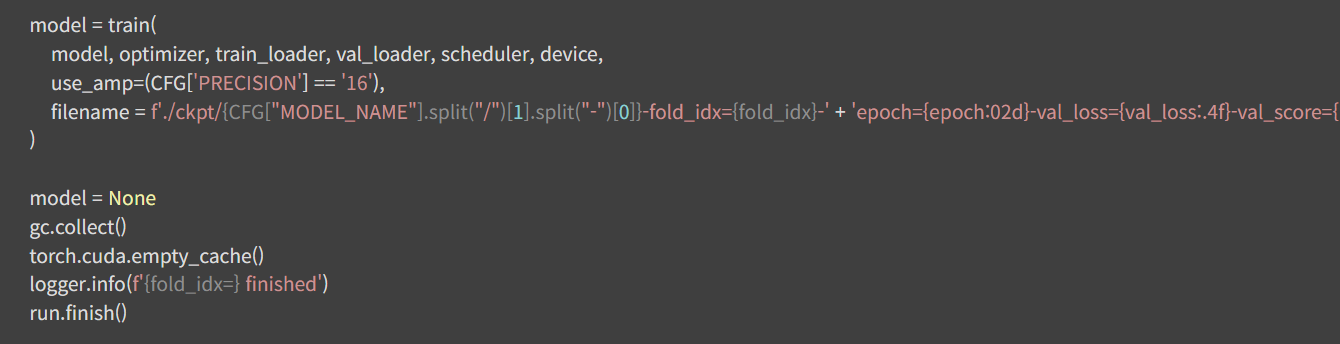

- 모델 앙상블 및 추론

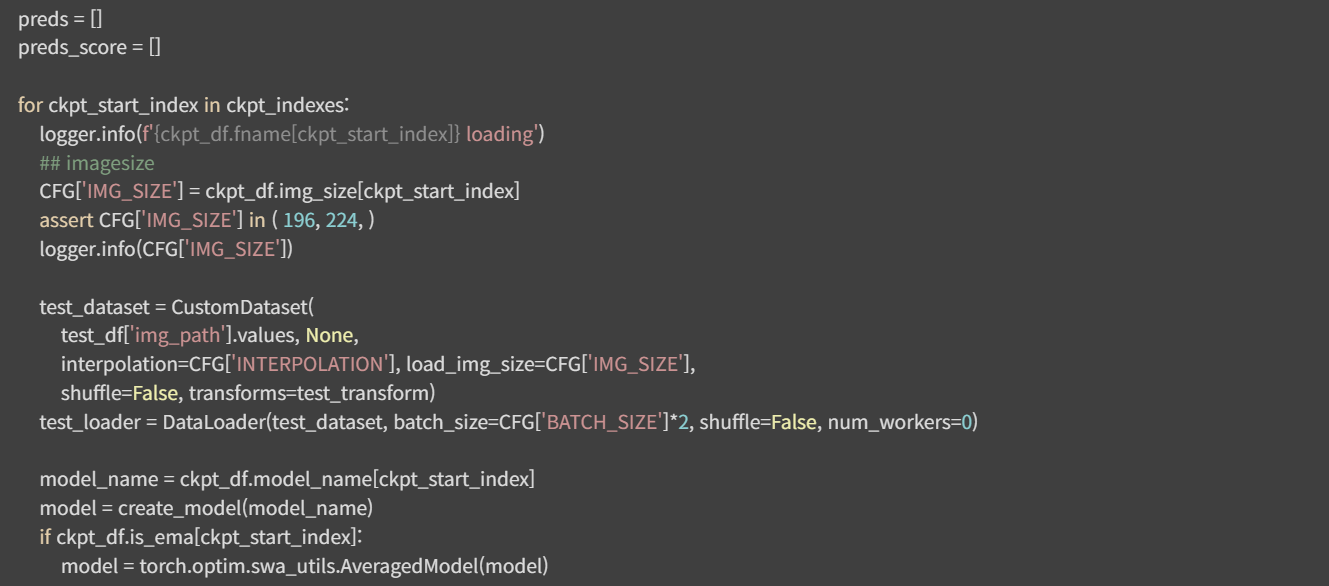

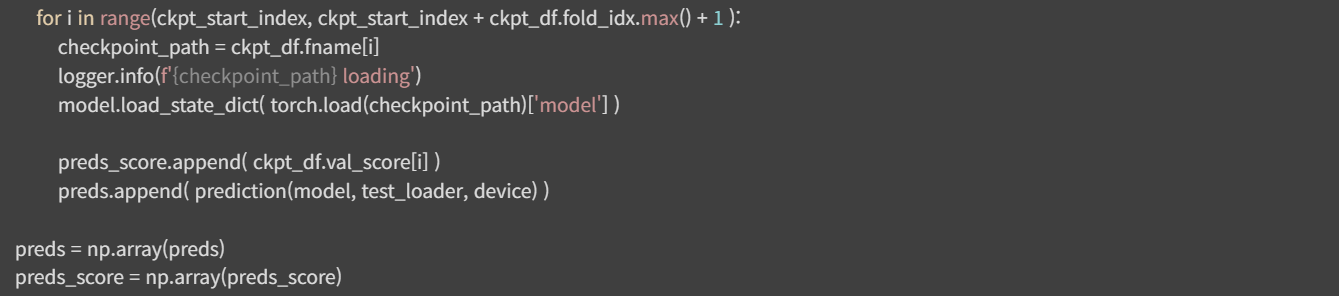

- 차별점, 배울점
    - 각종 모델을 돌려보는 과정을 통해 이미지 관련 모델 발전 방향을 알 수 있었다.
    - 이미지 모델이다보니 좋은 GPU가 아니면 모델 별 성능을 확인하는데 시간이 많이 걸린다.